<a href="https://www.kaggle.com/code/iamarunkumar/3-support-vector-machines?scriptVersionId=178355530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Support Vector Machines Intuition

Assume we have a dataset with 2 columns X1 and X2. It's plotted with two kind of categories. Category1 with red points and category2 with green points. It's the points 2dimensional space. It's already classified. 

Now, how are we going to seperate the classification. How does the boundary is created so that, if the new data point is added - under which category this datapoint will be classified ?. This is defined by the boundary line that we need to construct. One way may be the **vertical line** seperating the red points and green points. And may be the other way is an **horizontal line** seperating the 2 categories. Or even a **diagonal line**. If diagonal, we can have many diagonal lines. Of which, how will we consider the best line.

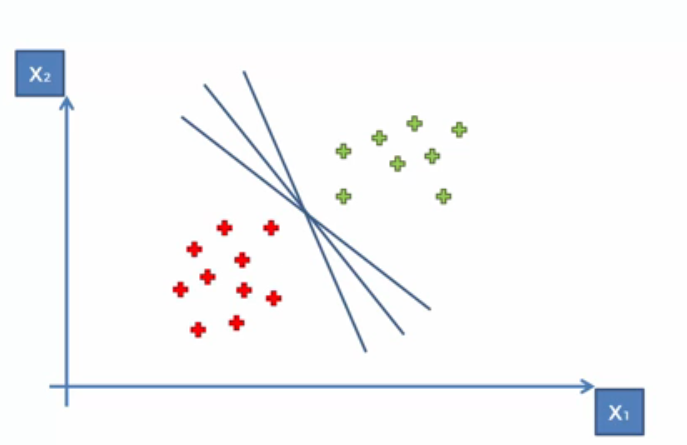

So, SVMs are all about finding the best line or the boundary that splits these datapoints. The line is **searched through the maximum margin**. It's the line that seperates the classes of points and at the sametime it has maximum margin which means, the distance or the equidistance that are the close to the **positive and negative hyperplane**. The distance between the maximum margin and it's hyperplane should be equal. Any line passing this condition could be the maximum margin line.

These 2 points are called **support vectors**. Because they are the one who support the entire algorithms. Even if we remove the other points, the algorithm doesn't gets affected. These 2 points are the one who supports the decision boundary and is called support vectors.

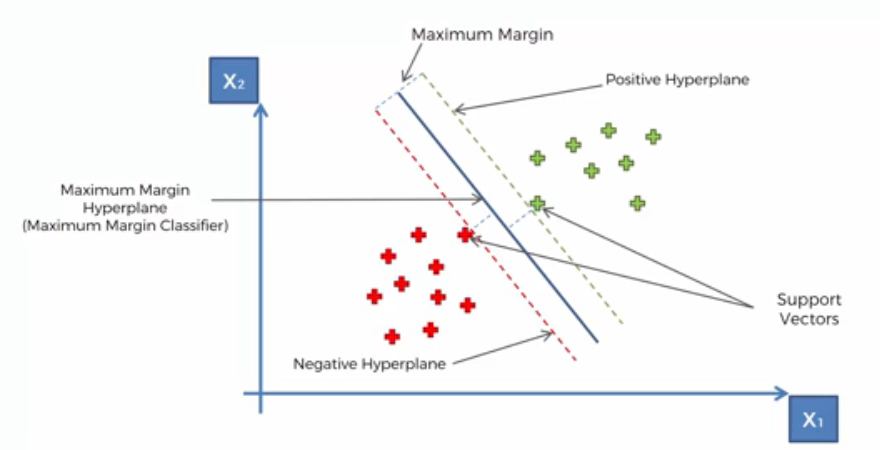

Now, how does, the **SVMx differ from other algorithm**

**Answer -** Suppose, you have an apple and an orange and try to teach the machine to classify them, we include parameters, we train them and test it to predict the correct ones. The way, it learns is, it just identify the **stock standard common type of apples or oranges**. It looks the **appley apples or the orangy oranges**. It also, looks the location where the very heart apple class far away from the orange for prediction. Vice versa to predict the apple as well. 

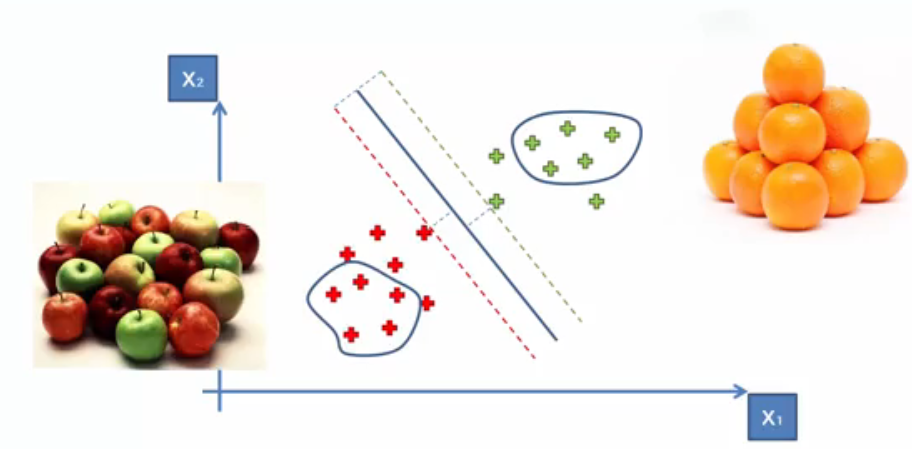

But, **SVMs**, usually take the orange that are not the orangey orange. It will observe that are very close to apples or in green color. Same way for apples, will look for apple in orange color that are close to orange. It works with this data **these 2 datapoints are called as support vectors** since it's close to maximum margin or the maximum margin classifier. Hence, this is the extreme type or the **rebelious type or risk type** of algorithm.

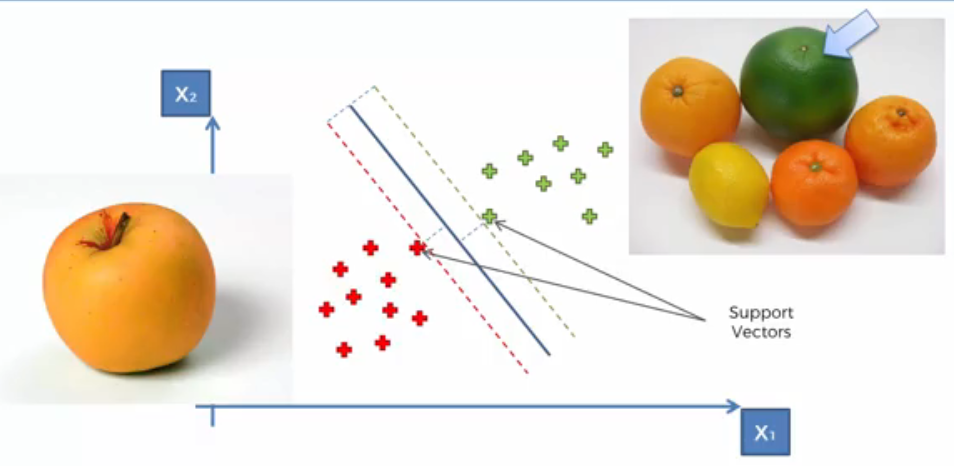

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

# Importing dataset

In [ ]:
df = pd.read_csv('/kaggle/input/data-for-social-network/Social_Network_Ads.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Taking care of missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

# Splitting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training SVM to dataset

In [ ]:
from sklearn.svm import SVC
"""We use the value for kernel parameter as linear in SVC class. This is because the default value is 'RBF' which is non-linear in
nature. Here we need linear model to check. So we use kernel as linear"""

classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train,y_train)

# Predicting a new result

In [ ]:
print(classifier.predict([[30,87000]]))

# Predicting the test set result

In [ ]:
y_pred = classifier.predict(sc.transform(X_test))
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

# Visualizing the test set

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbor (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()